In [79]:
import numpy as np
#scipy.special for sigmoid function, expit()
import scipy.special
import matplotlib.pyplot
%matplotlib inline 
#this creates the matplotlib gui, otherwise we'll return an object

class nnet:
    
    #all parameters are integers for initialization
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.inputNodes = inputNodes
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        self.learningRate = learningRate
        self.activationFunc = lambda x: scipy.special.expit(x) #sigmoid function
        
        #input to hidden weight matrix using normal distribution about 0; 1/sqrt(incoming edges)
        self.ihWt = np.random.normal(0.0, pow(self.inputNodes, -0.5), (self.hiddenNodes, self.inputNodes))
        #hidden to output layer matrix using normal distribution about 0; 1/sqrt(incoming edges)
        self.hoWt = np.random.normal(0.0, pow(self.hiddenNodes, -0.5), (self.outputNodes, self.hiddenNodes))
    
    def train(self, inputList, targetList): #providing both input and known solutions
        inputs = np.array(inputList, ndmin = 2).T #eigenstates
        target = np.array(targetList, ndmin = 2).T #eigenstate
        
        hiddenInput = np.dot(self.ihWt, inputs)
        hiddenOutput = self.activationFunc(hiddenInput)
        
        finalInput = np.dot(self.hoWt, hiddenOutput)
        finalOutput = self.activationFunc(finalInput)
        #################################################
        #backpropagation section
        
        outputErrors = target - finalOutput
        errorsHidden = np.dot(self.hoWt.T, outputErrors)
        #gradient descent part based on derivative of d(errors)/d(self.hoWt)
        self.hoWt += self.learningRate*np.dot(outputErrors*finalOutput*(1 - finalOutput), hiddenOutput.T)
        self.ihWt += self.learningRate*np.dot(errorsHidden*hiddenOutput*(1 - hiddenOutput), inputs.T)
        
        return
    
    
    def outp(self, inputList):
        inputs = np.array(inputList, ndmin = 2).T #input matrix turns into array from list, and make them eigenstates
        
        hiddenInput = np.dot(self.ihWt, inputs)
        hiddenOutput = self.activationFunc(hiddenInput)
        finalInput = np.dot(self.hoWt, hiddenOutput)
        finalOutput = self.activationFunc(finalInput)
        
        return finalOutput
    

#?np.random.normal
#?scipy.special

In [119]:
inputNodes = 784 #defined on data set
hiddenNodes = 200
outputNodes = 10
learningRate = 0.1

n = nnet(inputNodes, hiddenNodes, outputNodes, learningRate)

In [120]:
# #training and testing
# with open ('mnist_train.csv') as f:
#     data = f.readlines()
# #f.closed()    
# print(len(data))

# data = data[1].split(',')
# trainImage = np.asfarray(data[1:]).reshape((28,28))
# #plt = matplotlib.pyplot.imshow(trainImage, cmap = 'Greys', interpolation='None')

# scaledData = (np.asfarray(data[1:])/255.0 *0.99) + 0.01 #making the input between 0 and 1 for the activation functions
# #print(scaledData[:10])



In [121]:
# #training target, test
# #[0,0,0,0,1,0,0,0,0] with 0 = 0.001, 1 = 0.999, not 0s. Position on the list corresponds to the number we're looking for.
# #this case, it's 10 as the correct answer

# outputNodes = 10
# target = np.zeros(outputNodes) + 0.01
# #print(target)
# target[int(data[0])] = 0.99
# #print(target)

# f.close()

In [122]:
#train all data sets

f = open('mnist_train.csv', 'r')
trainingList = f.readlines()
f.close()
#print(trainingList[1])

epochs = 10
for run in range(epochs):
    for i in trainingList:
        data = i.split(',')
        #scale the input between 1 and 0
        inputArray = (np.asfarray(data[1:])/255.0 *0.99) + 0.01
        #all outputs should be 0.001s aside from the desired value of 0.99..
        target = np.zeros(outputNodes) + 0.01
        target[int(data[0])] = 0.99
        n.train(inputArray, target)

In [123]:
f = open('mnist_test.csv','r')
testDataList = f.readlines()
f.close()

#test individual data
# individualData = testDataList[0].split(',')
# print(individualData[0])

# image = np.asfarray(individualData[1:]).reshape(28,28)
# matplotlib.pyplot.imshow(image, cmap = 'Greys', interpolation=None)

In [124]:
#n.outp((np.asfarray(individualData[1:])/255.0 * 0.99) + 0.01) #we supposed to see a large value at the 7th position

In [125]:
score = []

for i in testDataList:
    data = i.split(',')
    resultLabel = int (data[0])
    print('Correct Result: ', resultLabel)
    
    inputList = (np.asfarray(data[1:])/255.0 * 0.99) + 0.01
    outputs = n.outp(inputList)
    result = np.argmax(outputs) #output the position of the largest value in the data, thus the label
    print("nnet result: ", result)
    
    if result == resultLabel:
        score.append(1)
    else:
        score.append(0)
    #print(inputList.shape)
#print(score)
score = np.asarray(score)
print("accuracy = ", score.sum()/score.size)

Correct Result:  7
nnet result:  7
Correct Result:  2
nnet result:  2
Correct Result:  1
nnet result:  1
Correct Result:  0
nnet result:  0
Correct Result:  4
nnet result:  4
Correct Result:  1
nnet result:  1
Correct Result:  4
nnet result:  4
Correct Result:  9
nnet result:  9
Correct Result:  5
nnet result:  9
Correct Result:  9
nnet result:  9
Correct Result:  0
nnet result:  0
Correct Result:  6
nnet result:  6
Correct Result:  9
nnet result:  9
Correct Result:  0
nnet result:  0
Correct Result:  1
nnet result:  1
Correct Result:  5
nnet result:  5
Correct Result:  9
nnet result:  9
Correct Result:  7
nnet result:  7
Correct Result:  3
nnet result:  3
Correct Result:  4
nnet result:  4
Correct Result:  9
nnet result:  9
Correct Result:  6
nnet result:  6
Correct Result:  6
nnet result:  6
Correct Result:  5
nnet result:  5
Correct Result:  4
nnet result:  4
Correct Result:  0
nnet result:  0
Correct Result:  7
nnet result:  7
Correct Result:  4
nnet result:  4
Correct Result:  0
n

# Personal Data Input Testing

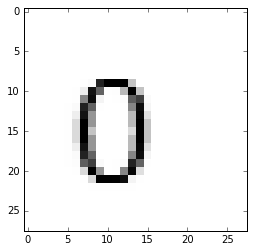

In [146]:
import scipy.misc

personalPicts = dict()

img = scipy.misc.imread('tc2.png', flatten = True) #we use 1d 28 pixels array for input
img = 255.0 - img.reshape(784) #mnist data is swapped. 0 for white and 1 for black instead of 0 for black and 255 for white
img = (img/255.0 * 0.99) + 0.01 #rescale to 0 and 1
#print(img, img.size)
matplotlib.pyplot.imshow(img.reshape(28,28), cmap='Greys', interpolation='None')

img2 = scipy.misc.imread('tc3.png', flatten = True)
img2 = 255.0 - img2.reshape(784)
img2 = (img2/255.0 * 0.99) + 0.01
#matplotlib.pyplot.imshow(img2.reshape(28,28), cmap='Greys', interpolation='None')

img3 = scipy.misc.imread('tc4.png', flatten = True)
img3 = 255.0 - img3.reshape(784)
img3 = (img3/255.0 * 0.99) + 0.01
#matplotlib.pyplot.imshow(img3.reshape(28,28), cmap='Greys', interpolation='None')

img4 = scipy.misc.imread('tc5.png', flatten = True)
img4 = 255.0 - img4.reshape(784)
img4 = (img4/255.0 * 0.99) + 0.01
matplotlib.pyplot.imshow(img4.reshape(28,28), cmap='Greys', interpolation='None')


#print(img2.shape)

In [148]:
outputs = n.outp(img4)
result = np.argmax(outputs)
print(outputs, result)

[[  1.24439469e-02]
 [  9.07175234e-03]
 [  2.97577813e-02]
 [  4.43120991e-04]
 [  1.08835396e-02]
 [  5.32126515e-03]
 [  3.04270343e-01]
 [  1.23492673e-03]
 [  3.84141549e-02]
 [  2.89767004e-04]] 6
